# Running SOM on Txt: Topic Detection, Sentiment Analysis

## TF-IDF model

In order to work with text, as described by (Sharma and Dey, 2013) or (Simoes, 2014), as well as the authors of the Java SOMToolbox at TU Wien [http://www.ifs.tuwien.ac.at/dm/somtoolbox/], text needs to be represented numerically (as descrbied in ifs' [Section on Text Representation](http://www.ifs.tuwien.ac.at/~andi/somlib/textrepresentation.html)), such as a Vector Space Model (VSM)  - using a bag-of-words approach or a more sofisticated term frequency - inverse document frequency (TF-IDF) model. 

### Method 1

In [2]:
import pandas as pd

In [3]:
cols = ['sentiment','id','date','query_string','user','text']
# load a training set, Stanford University 'Sentiment140' : http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip 
df = pd.read_csv("Twitter_MINING/sentiment-analysis/training.1600000.processed.noemoticon.csv",header=None, names=cols, encoding='latin-1')
# above line will be different depending on where you saved your data, and your file name
df.head()

sentiment          id                          date query_string  \
0          0  1467810369  Mon Apr 06 22:19:45 PDT 2009     NO_QUERY   
1          0  1467810672  Mon Apr 06 22:19:49 PDT 2009     NO_QUERY   
2          0  1467810917  Mon Apr 06 22:19:53 PDT 2009     NO_QUERY   
3          0  1467811184  Mon Apr 06 22:19:57 PDT 2009     NO_QUERY   
4          0  1467811193  Mon Apr 06 22:19:57 PDT 2009     NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....

In [4]:
df.sentiment.value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [5]:
# drop unnecessary columns
df.drop(['id','date','query_string','user'],axis=1,inplace=True)

In [16]:
# look at positive (0) and negative (4) sentiment 
negative_df = df[df.sentiment == 0]
print(negative_df.head(10))
positive_df = df[df.sentiment == 4]
print(positive_df.head(10))

   sentiment                                               text
0          0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          0  is upset that he can't update his Facebook by ...
2          0  @Kenichan I dived many times for the ball. Man...
3          0    my whole body feels itchy and like its on fire 
4          0  @nationwideclass no, it's not behaving at all....
5          0                      @Kwesidei not the whole crew 
6          0                                        Need a hug 
7          0  @LOLTrish hey  long time no see! Yes.. Rains a...
8          0               @Tatiana_K nope they didn't have it 
9          0                          @twittera que me muera ? 
        sentiment                                               text
800000          4       I LOVE @Health4UandPets u guys r the best!! 
800001          4  im meeting up with one of my besties tonight! ...
800002          4  @DaRealSunisaKim Thanks for the Twitter add, S...
800003          4  B

In [6]:
# data cleaning function:
'''
1. Souping / resolve problems with HTML encoding
2. BOM (Byte Order Mark) removing / in py2 solved by decoding to utf-8-sig; in py3 simply replace the characters 
3. url address(‘http:’pattern), twitter ID removing
4. url address(‘www.'pattern) removing
5. lower-case
6. negation handling (replace key with values from negation_dic)
7. removing numbers and special characters
8. tokenizing and joining
'''
# import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [8]:
# clean the tweets, create a list of clean tweets
%time
print("Cleaning the tweets...\n")
clean_tweet_texts = []
for i in range(0,len(df)):
    if( (i+1)%100000 == 0 ):
        print("Tweets", i+1, "of ", len(df), "has been processed")                                                                   
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
Cleaning the tweets...

Tweets 100000 of  1600000 has been processed
Tweets 200000 of  1600000 has been processed
Tweets 300000 of  1600000 has been processed
Tweets 400000 of  1600000 has been processed
Tweets 500000 of  1600000 has been processed
Tweets 600000 of  1600000 has been processed
Tweets 700000 of  1600000 has been processed
Tweets 800000 of  1600000 has been processed
Tweets 900000 of  1600000 has been processed
Tweets 1000000 of  1600000 has been processed
Tweets 1100000 of  1600000 has been processed
Tweets 1200000 of  1600000 has been processed
Tweets 1300000 of  1600000 has been processed
Tweets 1400000 of  1600000 has been processed
Tweets 1500000 of  1600000 has been processed
Tweets 1600000 of  1600000 has been processed


In [14]:
# create clean_df from cleaned tweets and original df 'sentiment' column
# write clean_df to a csv file
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df.sentiment
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
clean_df.head()

text  target
0  awww that bummer you shoulda got david carr of...       0
1  is upset that he can not update his facebook b...       0
2  dived many times for the ball managed to save ...       0
3     my whole body feels itchy and like its on fire       0
4  no it not behaving at all mad why am here beca...       0

In [15]:
# re-read the new dataframe into my_df (is this where null entries appear?)
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

/Users/zoza/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


text  target
0  awww that bummer you shoulda got david carr of...       0
1  is upset that he can not update his facebook b...       0
2  dived many times for the ball managed to save ...       0
3     my whole body feels itchy and like its on fire       0
4  no it not behaving at all mad why am here beca...       0

In [16]:
# inspect the new dataframe
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
text      1596041 non-null object
target    1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 36.6+ MB


In [17]:
# are there any null entires in any axis? show the first five null entries in axis1
# most probably all null entries are tweets where the only text information was either twitter ID or a URL address
print(my_df.isnull().any(axis=0))
my_df[my_df.isnull().any(axis=1)].head()

text       True
target    False
dtype: bool


text  target
208  NaN       0
249  NaN       0
282  NaN       0
398  NaN       0
430  NaN       0

In [18]:
# how many entries are null? (already readable in .info()) 
np.sum(my_df.isnull().any(axis=1))

3959

In [19]:
# drop null entires, update dataframe
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596041 entries, 0 to 1596040
Data columns (total 2 columns):
text      1596041 non-null object
target    1596041 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


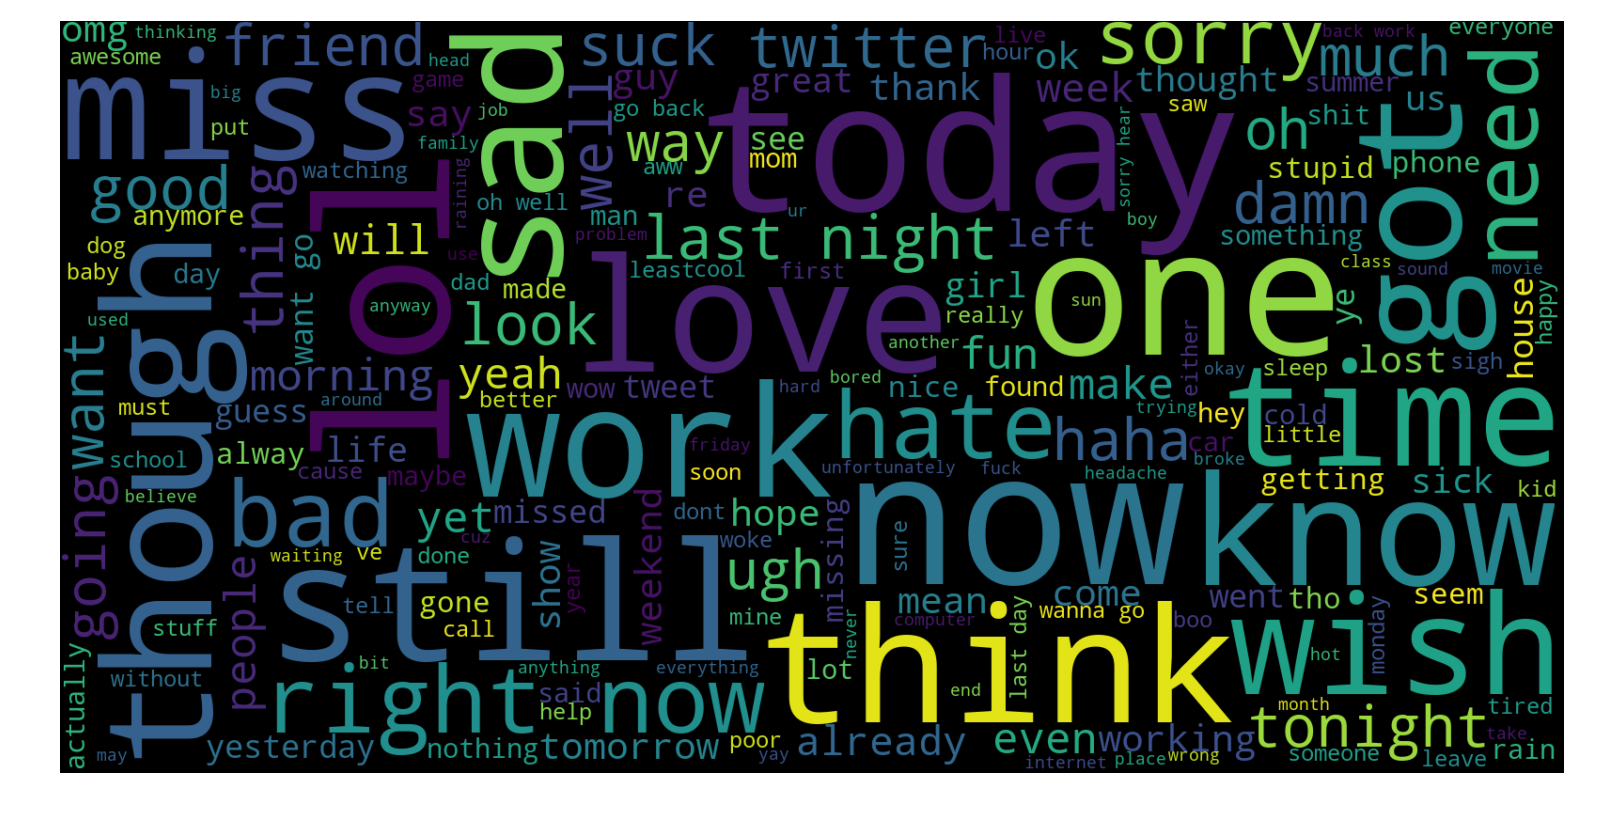

In [46]:
# plot a wordcloud of negative tweets
neg_tweets = my_df[my_df.target == 0]
neg_string = []
for t in neg_tweets.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

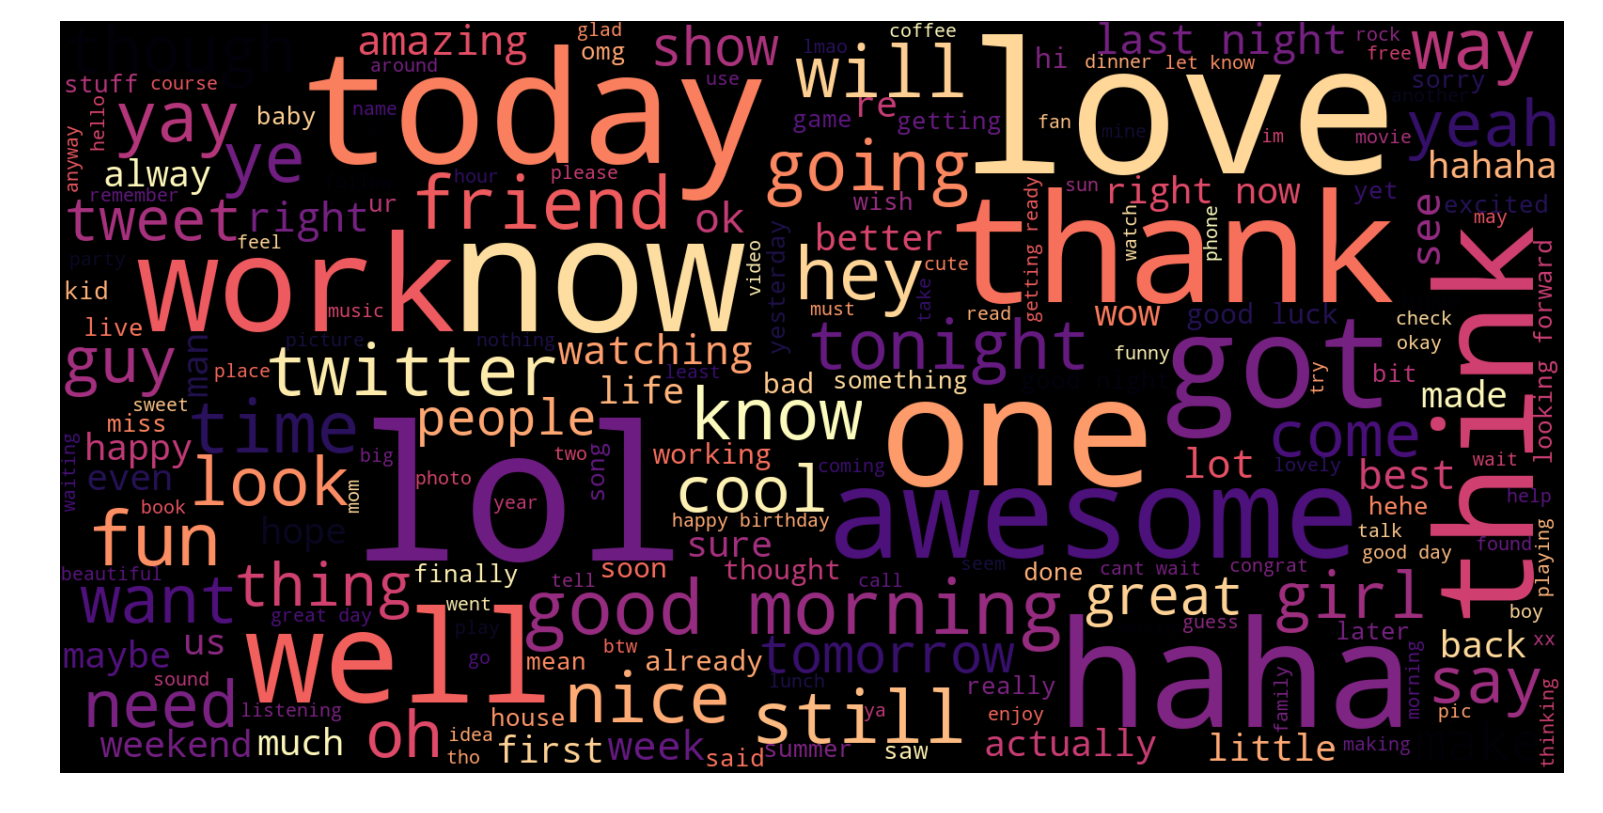

In [48]:
# plot a wordcloud of positive tweets
pos_tweets = my_df[my_df.target == 4]
pos_string = []
for t in pos_tweets.text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [49]:
# now, remove all lists and dataframes no longer needed:
del pos_tweets, pos_string, neg_tweets, neg_string, wordcloud, df, clean_df

#### vectorize, get term frequencies and visualize

In [20]:
# count vectorizer to calculate the term frequencies; do not remove stopwords
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(my_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [21]:
# how many words has the count vectorizer extracted?
len(cvec.get_feature_names())

264939

In [22]:
# term frequency per class (positive, negative)
# transform sparse matrix into a dense matrix
neg_doc_matrix = cvec.transform(my_df[my_df.target == 0].text)
pos_doc_matrix = cvec.transform(my_df[my_df.target == 4].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose() #term_freq_df is with stopwords

In [23]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

negative  positive   total
to     313162    252567  565729
the    257836    265998  523834
my     190775    125955  316730
it     157448    147786  305234
and    153958    149642  303600
you    103844    198245  302089
not    194724     86861  281585
is     133432    111191  244623
in     115542    101160  216702
for     98999    117369  216368

In [56]:
term_freq_df.to_csv('term_freq_df.csv',encoding='utf-8')

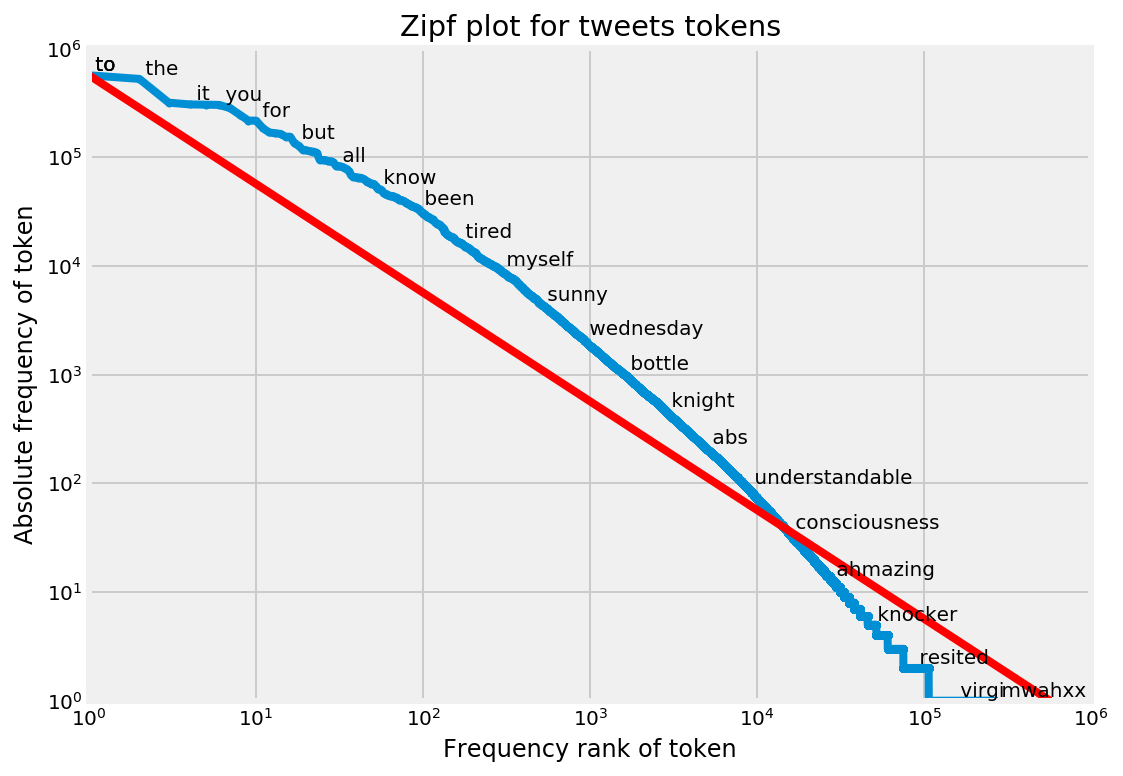

In [57]:
# Plot Zipf's law table
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

#### Visualize tokens only, stopwords removed

In [58]:
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(my_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [59]:
document_matrix = cvec.transform(my_df.text)

In [60]:
%%time
neg_batches = np.linspace(0,798179,10).astype(int) # from 0 to 798179
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    print(neg_batches[i+1],"entries' term freuquency calculated")
    i += 1

88686 entries' term freuquency calculated
177373 entries' term freuquency calculated
266059 entries' term freuquency calculated
354746 entries' term freuquency calculated
443432 entries' term freuquency calculated
532119 entries' term freuquency calculated
620805 entries' term freuquency calculated
709492 entries' term freuquency calculated
798179 entries' term freuquency calculated
CPU times: user 18.9 s, sys: 30.2 s, total: 49.1 s
Wall time: 56 s


In [61]:
%%time
pos_batches = np.linspace(798179,1596019,10).astype(int) # from 798179 to 1596019 (the end)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    print(pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

886827 entries' term freuquency calculated
975476 entries' term freuquency calculated
1064125 entries' term freuquency calculated
1152774 entries' term freuquency calculated
1241423 entries' term freuquency calculated
1330072 entries' term freuquency calculated
1418721 entries' term freuquency calculated
1507370 entries' term freuquency calculated
1596019 entries' term freuquency calculated
CPU times: user 18.3 s, sys: 27.8 s, total: 46 s
Wall time: 49.8 s


In [62]:
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
term_freq_df2 = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose() # term_freq_df2 is without stopwords
term_freq_df2.columns = ['negative', 'positive']
term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
term_freq_df2.sort_values(by='total', ascending=False).iloc[:10]

negative  positive   total
just      64002     62943  126945
good      29208     62117   91325
day       41372     48188   89560
like      41047     37522   78569
today     38116     30100   68216
work      45419     19529   64948
love      16989     47695   64684
going     33689     30939   64628
got       33408     28037   61445
lol       23123     36118   59241

Text(0.5,1,'Negative Frequency vs Positive Frequency')

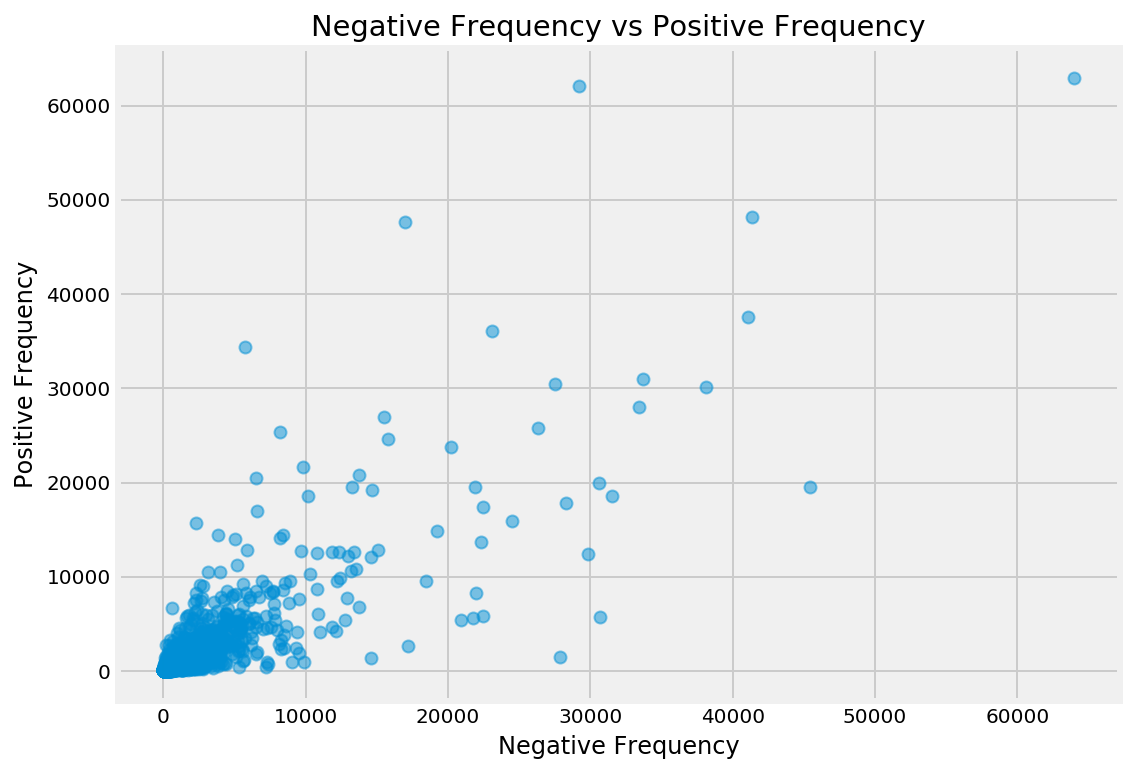

In [63]:
# plot negative and positive tokens frequency along x and y axes
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')

In [65]:
# better approximation 
# hmean for positive and negative rate
from scipy.stats import hmean, norm
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())

term_freq_df2['pos_rate'] = term_freq_df2['positive'] * 1./term_freq_df2['total']
term_freq_df2['pos_freq_pct'] = term_freq_df2['positive'] * 1./term_freq_df2['positive'].sum()
term_freq_df2['pos_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['pos_rate'], x['pos_freq_pct']])
                                                                   if x['pos_rate'] > 0 and x['pos_freq_pct'] > 0 
                                                                   else 0), axis=1) 
term_freq_df2['pos_rate_normcdf'] = normcdf(term_freq_df2['pos_rate'])
term_freq_df2['pos_freq_pct_normcdf'] = normcdf(term_freq_df2['pos_freq_pct'])
term_freq_df2['pos_normcdf_hmean'] = hmean([term_freq_df2['pos_rate_normcdf'], term_freq_df2['pos_freq_pct_normcdf']])
# show 10 first positive tokens according to the hmean (harmonic mean) of the two CDF (Cumulative Distribution Function) values,
term_freq_df2.sort_values(by='pos_normcdf_hmean', ascending=False).iloc[:10]

negative  positive  total  pos_rate  pos_freq_pct  pos_hmean  \
welcome       620      6702   7322  0.915324      0.001533   0.003061   
thank        2282     15736  18018  0.873349      0.003599   0.007169   
thanks       5768     34375  40143  0.856314      0.007862   0.015581   
awesome      3821     14469  18290  0.791088      0.003309   0.006591   
glad         2273      8254  10527  0.784079      0.001888   0.003767   
follow       2551      9155  11706  0.782078      0.002094   0.004177   
enjoy        1642      5876   7518  0.781591      0.001344   0.002683   
sweet        1610      5646   7256  0.778115      0.001291   0.002578   
yay          3165     10500  13665  0.768386      0.002401   0.004788   
hello        1122      4524   5646  0.801275      0.001035   0.002067   

         pos_rate_normcdf  pos_freq_pct_normcdf  pos_normcdf_hmean  
welcome          0.995624              0.999369           0.997493  
thank            0.990793              1.000000           0.995375  
thanks           0.987772              1.000000           0.993848  
awesome          0.967042              1.000000           0.983245  
glad             0.963660              0.999971           0.981480  
follow           0.962644              0.999996           0.980965  
enjoy            0.962393              0.997441           0.979604  
sweet            0.960563              0.996331           0.978121  
yay              0.955055              1.000000           0.977011  
hello            0.971490              0.982294           0.976862

In [67]:
term_freq_df2['neg_rate'] = term_freq_df2['negative'] * 1./term_freq_df2['total']
term_freq_df2['neg_freq_pct'] = term_freq_df2['negative'] * 1./term_freq_df2['negative'].sum()
term_freq_df2['neg_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['neg_rate'], x['neg_freq_pct']])
                                                                   if x['neg_rate'] > 0 and x['neg_freq_pct'] > 0 
                                                                   else 0), axis=1)                                                        
term_freq_df2['neg_rate_normcdf'] = normcdf(term_freq_df2['neg_rate'])
term_freq_df2['neg_freq_pct_normcdf'] = normcdf(term_freq_df2['neg_freq_pct'])
term_freq_df2['neg_normcdf_hmean'] = hmean([term_freq_df2['neg_rate_normcdf'], term_freq_df2['neg_freq_pct_normcdf']])
# show 10 first negative tokens according to the hmean (harmonic mean) of these two CDF (Cumulative Distribution Function) values, of both pos_rate and pos_freq_pct
term_freq_df2.sort_values(by='neg_normcdf_hmean', ascending=False).iloc[:10]

negative  positive  total  pos_rate  pos_freq_pct  pos_hmean  \
sad          27907      1514  29421  0.051460      0.000346   0.000688   
hurts         7204       456   7660  0.059530      0.000104   0.000208   
sick         14616      1420  16036  0.088551      0.000325   0.000647   
sucks         9902       982  10884  0.090224      0.000225   0.000448   
poor          7333       719   8052  0.089295      0.000164   0.000328   
ugh           9055       998  10053  0.099274      0.000228   0.000455   
missing       7282       991   8273  0.119787      0.000227   0.000452   
headache      5317       421   5738  0.073371      0.000096   0.000192   
hate         17207      2614  19821  0.131880      0.000598   0.001190   
miss         30713      5676  36389  0.155981      0.001298   0.002575   

          pos_rate_normcdf  pos_freq_pct_normcdf  pos_normcdf_hmean  neg_rate  \
sad               0.002399              0.710297           0.004781  0.948540   
hurts             0.002807              0.503855           0.005583  0.940470   
sick              0.004845              0.693525           0.009623  0.911449   
sucks             0.004995              0.610420           0.009910  0.909776   
poor              0.004912              0.557659           0.009737  0.910705   
ugh               0.005882              0.613575           0.011653  0.900726   
missing           0.008426              0.612195           0.016624  0.880213   
headache          0.003656              0.496667           0.007258  0.926629   
hate              0.010341              0.868741           0.020439  0.868120   
miss              0.015313              0.996497           0.030162  0.844019   

          neg_freq_pct  neg_hmean  neg_rate_normcdf  neg_freq_pct_normcdf  \
sad           0.006095   0.012112          0.997601              1.000000   
hurts         0.001573   0.003142          0.997193              0.999742   
sick          0.003192   0.006362          0.995155              1.000000   
sucks         0.002163   0.004315          0.995005              0.999999   
poor          0.001602   0.003198          0.995088              0.999799   
ugh           0.001978   0.003947          0.994118              0.999995   
missing       0.001590   0.003175          0.991574              0.999778   
headache      0.001161   0.002320          0.996344              0.993812   
hate          0.003758   0.007484          0.989659              1.000000   
miss          0.006708   0.013310          0.984687              1.000000   

          neg_normcdf_hmean  
sad                0.998799  
hurts              0.998466  
sick               0.997572  
sucks              0.997496  
poor               0.997438  
ugh                0.997048  
missing            0.995659  
headache           0.995076  
hate               0.994802  
miss               0.992284

Text(0.5,1,'neg_normcdf_hmean vs pos_normcdf_hmean')

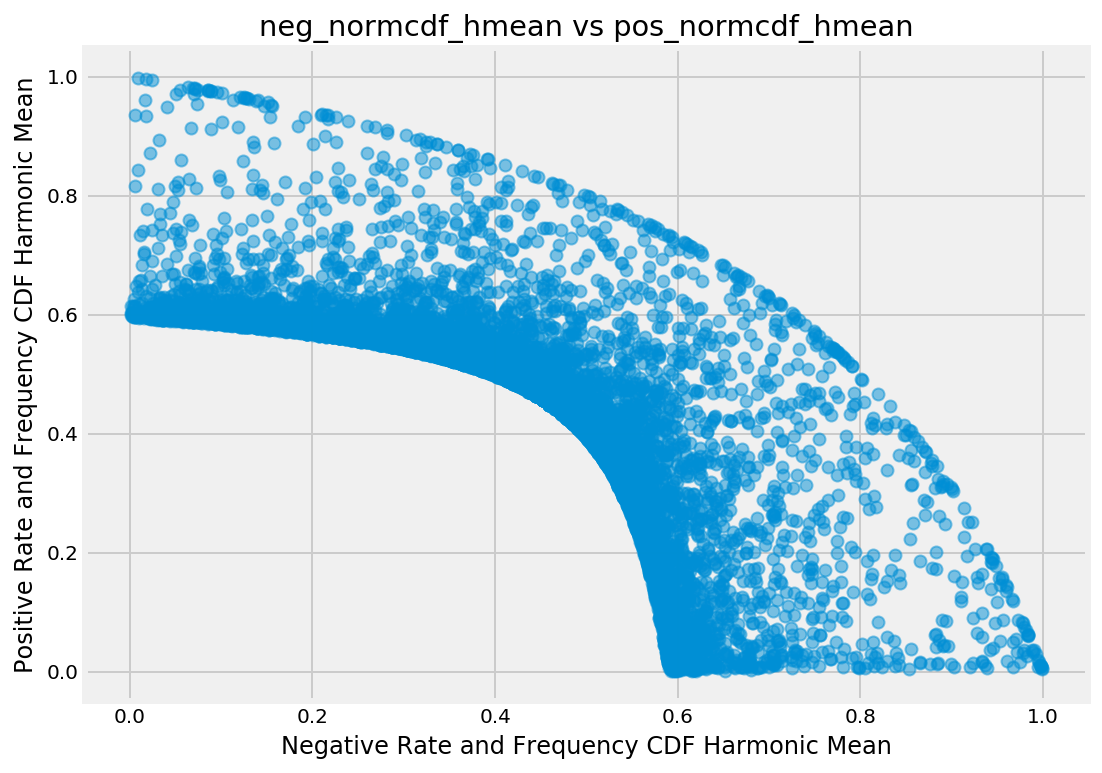

In [69]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_normcdf_hmean", y="pos_normcdf_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency CDF Harmonic Mean')
plt.xlabel('Negative Rate and Frequency CDF Harmonic Mean')
plt.title('neg_normcdf_hmean vs pos_normcdf_hmean')

In [70]:
# visualize negative and ppositive norm cdf hmean using bokeh
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import LinearColorMapper
output_notebook()
color_mapper = LinearColorMapper(palette='Inferno256', low=min(term_freq_df2.pos_normcdf_hmean), high=max(term_freq_df2.pos_normcdf_hmean))
p = figure(x_axis_label='neg_normcdf_hmean', y_axis_label='pos_normcdf_hmean')
p.circle('neg_normcdf_hmean','pos_normcdf_hmean',size=5,alpha=0.3,source=term_freq_df2,color={'field': 'pos_normcdf_hmean', 'transform': color_mapper})
from bokeh.models import HoverTool
hover = HoverTool(tooltips=[('token','@index')])
p.add_tools(hover)
show(p)

Loading BokehJS ...

#### Count Vectorizer and Confusion Matrix
Prepare for model-building

In [83]:
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [85]:
x = my_df.text
y = my_df.target
from sklearn.model_selection import train_test_split
SEED = 2000

x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=SEED)

x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_train), (len(x_train[y_train == 0]) / (len(x_train)*1.))*100, (len(x_train[y_train == 1]) / (len(x_train)*1.))*100))
print("Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_validation), (len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100, (len(x_validation[y_validation == 1]) / (len(x_validation)*1.))*100))
print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_test), (len(x_test[y_test == 0]) / (len(x_test)*1.))*100, (len(x_test[y_test == 1]) / (len(x_test)*1.))*100))

Train set has total 1564120 entries with 50.02% negative, 0.00% positive
Validation set has total 15960 entries with 49.45% negative, 0.00% positive
Test set has total 15961 entries with 49.68% negative, 0.00% positive


In [87]:
# compare various machine learning algorithms using Zero Rule classifier: predicts the majority category (class)
# have a look at this: https://machinelearningmastery.com/implement-baseline-machine-learning-algorithms-scratch-python/

In [89]:
# compare the validation results with is TextBlob
from textblob import TextBlob
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

tbresult = [TextBlob(i).sentiment.polarity for i in x_validation]
tbpred = [0 if n < 0 else 1 for n in tbresult]

conmat = np.array(confusion_matrix(y_validation, tbpred, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['positive', 'negative'],
                         columns=['predicted_positive','predicted_negative'])

print("Accuracy Score: {0:.2f}%".format(accuracy_score(y_validation, tbpred)*100))
print("-"*80)
print("Confusion Matrix\n")
print(confusion)
print("-"*80)
print("Classification Report\n")
print(classification_report(y_validation, tbpred))

Accuracy Score: 16.21%
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_positive  predicted_negative
positive                   0                   0
negative                5306                2587
--------------------------------------------------------------------------------
Classification Report

             precision    recall  f1-score   support

          0       0.77      0.33      0.46      7893
          1       0.00      0.00      0.00         0
          4       0.00      0.00      0.00      8067

avg / total       0.38      0.16      0.23     15960



/Users/zoza/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/zoza/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [92]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, train_test_time

cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000,100001,10000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

In [94]:
# check if the same dataframe: 
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

negative  positive   total
to     313162    252567  565729
the    257836    265998  523834
my     190775    125955  316730
it     157448    147786  305234
and    153958    149642  303600
you    103844    198245  302089
not    194724     86861  281585
is     133432    111191  244623
in     115542    101160  216702
for     98999    117369  216368

In [95]:
# are the top 10 most frequent words also in the SKLearn’s stop words list
from sklearn.feature_extraction import text

a = frozenset(list(term_freq_df.sort_values(by='total', ascending=False).iloc[:10].index))
b = text.ENGLISH_STOP_WORDS
set(a).issubset(set(b))

True

In [96]:
#  run “nfeature_accuracy_checker” on three different conditions. First with stop words removal, second with custom defined stop words removal, third without stop words removal
print("RESULT FOR UNIGRAM WITHOUT STOP WORDS\n")
feature_result_wosw = nfeature_accuracy_checker(stop_words='english')

print("RESULT FOR UNIGRAM WITH STOP WORDS\n")
feature_result_ug = nfeature_accuracy_checker()

my_stop_words = frozenset(list(term_freq_df.sort_values(by='total', ascending=False).iloc[:10].index))
print("RESULT FOR UNIGRAM WITHOUT CUSTOM STOP WORDS (Top 10 frequent words)\n")
feature_result_wocsw = nfeature_accuracy_checker(stop_words=my_stop_words)

RESULT FOR UNIGRAM WITHOUT STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 10000 features
null accuracy: 50.55%
accuracy score: 77.34%
model is 26.80% more accurate than null accuracy
train and test time: 75.75s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 50.55%
accuracy score: 77.66%
model is 27.11% more accurate than null accuracy
train and test time: 77.41s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 50.55%
accuracy score: 77.78%
model is 27.24% more accurate than null accuracy
train and test time: 74.52s
-------------------------------------------------------

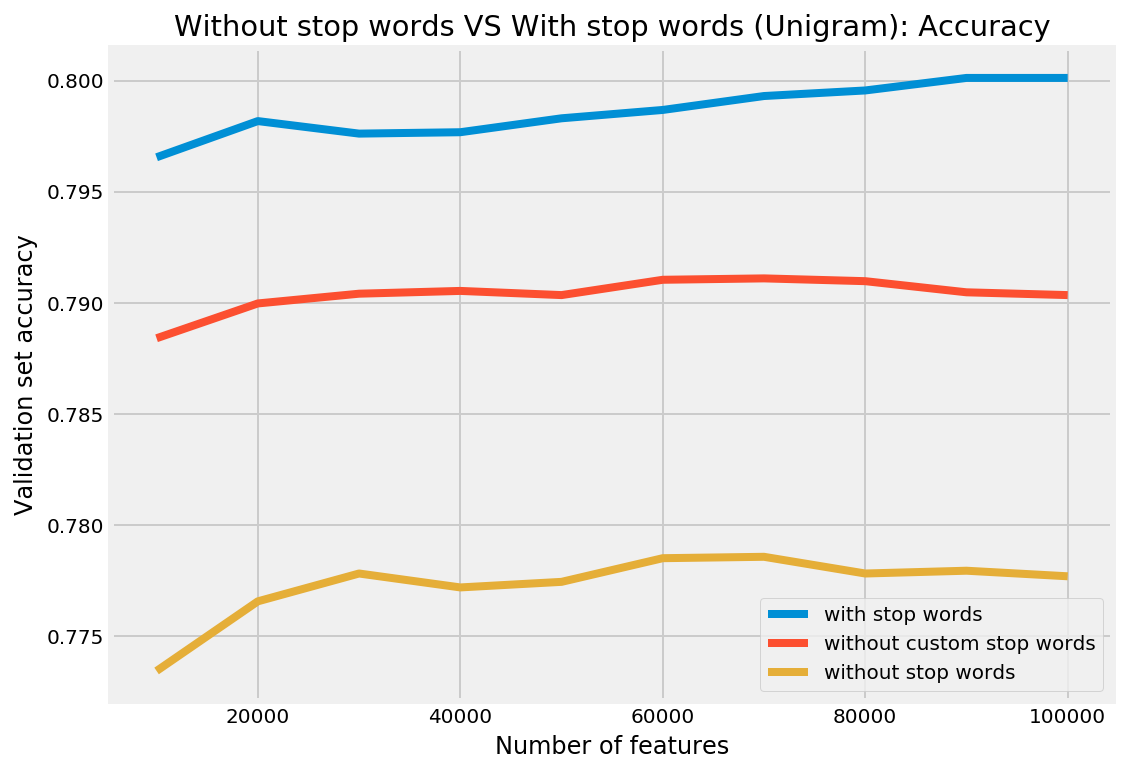

In [97]:
# plot accuracy check results
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug_wocsw = pd.DataFrame(feature_result_wocsw,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug_wosw = pd.DataFrame(feature_result_wosw,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='with stop words')
plt.plot(nfeatures_plot_ug_wocsw.nfeatures, nfeatures_plot_ug_wocsw.validation_accuracy,label='without custom stop words')
plt.plot(nfeatures_plot_ug_wosw.nfeatures, nfeatures_plot_ug_wosw.validation_accuracy,label='without stop words')
plt.title("Without stop words VS With stop words (Unigram): Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [100]:
# check how extending the the bag-of-words to bigrams and trigrams affects the resutls
print("RESULT FOR BIGRAM WITH STOP WORDS\n")
feature_result_bg = nfeature_accuracy_checker(ngram_range=(1, 2))

print("RESULT FOR TRIGRAM WITH STOP WORDS\n")
feature_result_tg = nfeature_accuracy_checker(ngram_range=(1, 3))

RESULT FOR BIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 10000 features
null accuracy: 50.55%
accuracy score: 80.58%
model is 30.04% more accurate than null accuracy
train and test time: 205.12s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 50.55%
accuracy score: 81.39%
model is 30.85% more accurate than null accuracy
train and test time: 207.76s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 50.55%
accuracy score: 81.79%
model is 31.25% more accurate than null accuracy
train and test time: 183.36s
--------------------------------------------------------

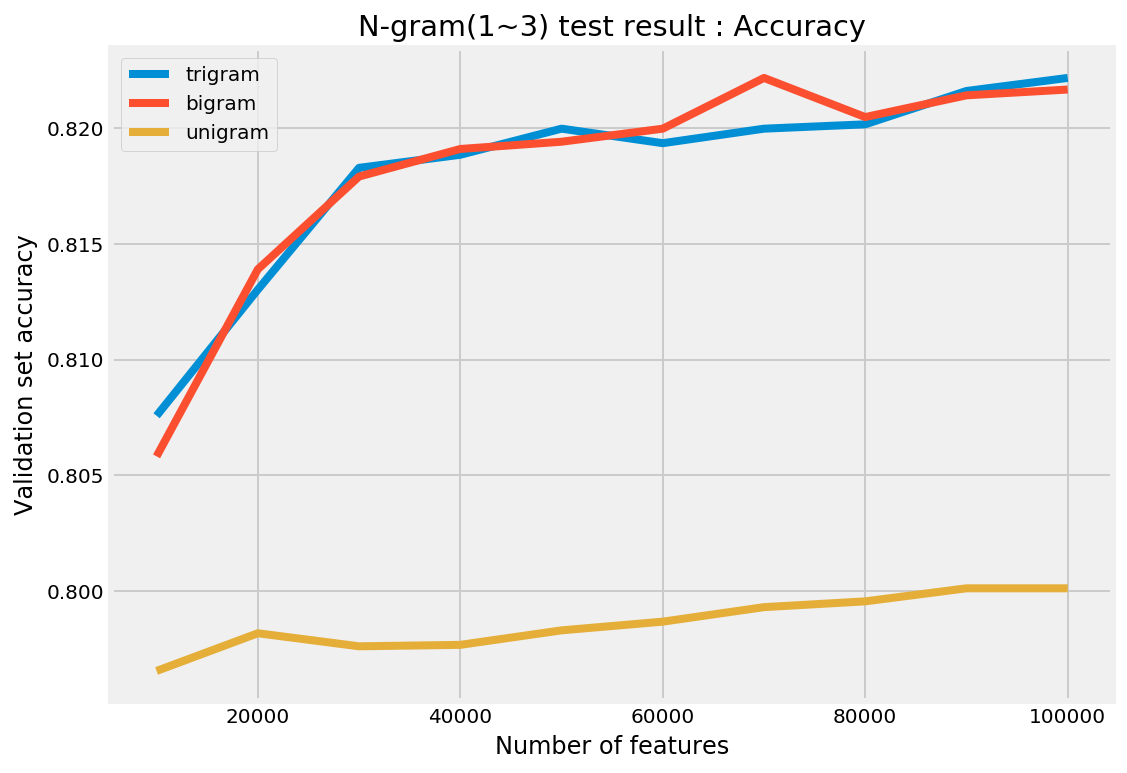

In [101]:
# plot the results
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [104]:
def train_test_and_evaluate(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=[0,1]))
    confusion = pd.DataFrame(conmat, index=['negative', 'positive'],
                         columns=['predicted_negative','predicted_positive'])
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("-"*80)
    print("Confusion Matrix\n")
    print(confusion)
    print("-"*80)
    print("Classification Report\n")
    print(classification_report(y_test, y_pred, target_names=['negative','positive']))

In [105]:
%%time
tg_cvec = CountVectorizer(max_features=80000,ngram_range=(1, 3))
tg_pipeline = Pipeline([
        ('vectorizer', tg_cvec),
        ('classifier', lr)
    ])
train_test_and_evaluate(tg_pipeline, x_train, y_train, x_validation, y_validation)

null accuracy: 50.55%
accuracy score: 82.02%
model is 31.47% more accurate than null accuracy
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_negative  predicted_positive
negative                6294                   0
positive                   0                   0
--------------------------------------------------------------------------------
Classification Report

             precision    recall  f1-score   support

   negative       0.83      0.80      0.81      7893
   positive       0.81      0.84      0.83      8067

avg / total       0.82      0.82      0.82     15960

CPU times: user 7min 48s, sys: 9.38 s, total: 7min 57s
Wall time: 8min 9s


#### The TF IDF model

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()

feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))


nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 10000 features
null accuracy: 50.55%
accuracy score: 79.74%
model is 29.19% more accurate than null accuracy
train and test time: 70.24s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 50.55%
accuracy score: 80.02%
model is 29.47% more accurate than null accuracy
train and test time: 71.65s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 50.55%
accuracy score: 80.12%
model is 29.57% more accurate than null accuracy
train and test time: 67.22s
--------------------------------------------------------------------------------
Validation re

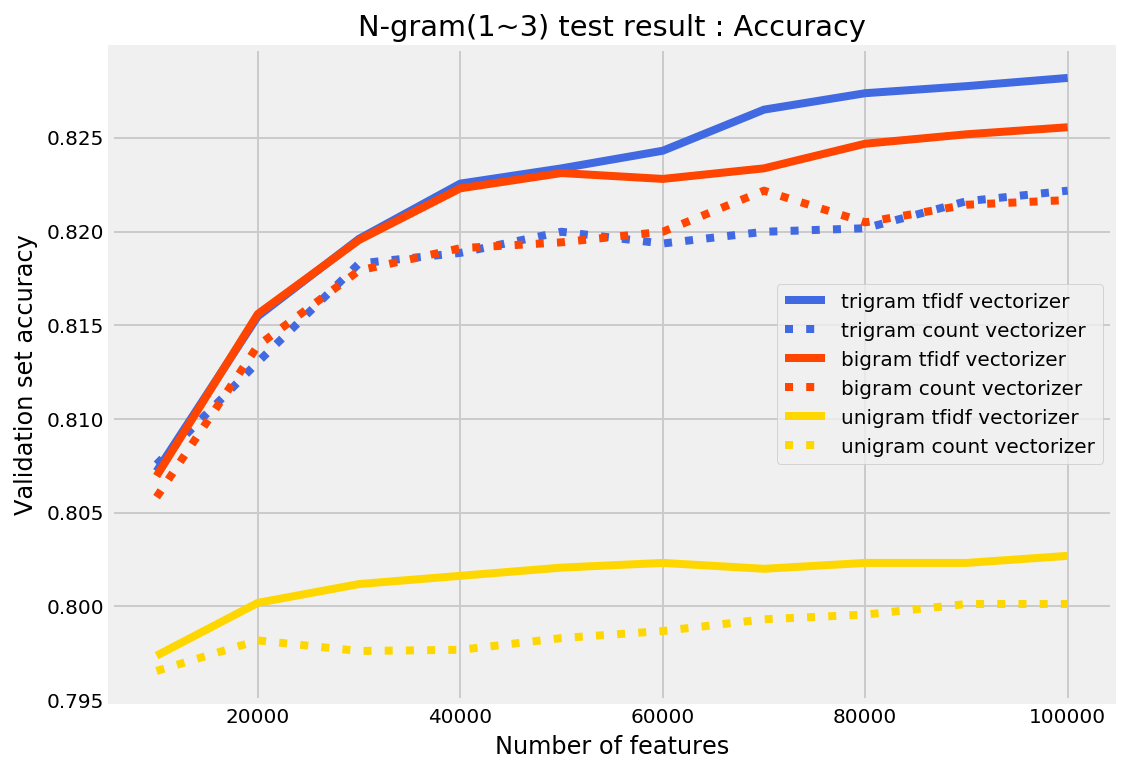

In [108]:
# plot compare results from n feature accuracy and tf-idf feature vectorizer
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [109]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel

names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)

tvec = TfidfVectorizer()
def classifier_comparator(vectorizer=tvec, n_features=10000, stop_words=None, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        print(c)
        clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,clf_accuracy,tt_time))
    return result

trigram_result = classifier_comparator(n_features=100000,ngram_range=(1,3))

Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
null accuracy: 50.55%
accuracy score: 82.82%
model is 32.27% more accurate than null accuracy
train and test time: 397.33s
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
null accuracy: 50.55%
accuracy score: 82.33%
model is 31.79% more accurate than null accuracy
train and test time: 424.14s
--------------------------------------------------------------------------------
Validation result for LinearSVC with 

/Users/zoza/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


null accuracy: 50.55%
accuracy score: 76.40%
model is 25.85% more accurate than null accuracy
train and test time: 202.88s
--------------------------------------------------------------------------------
Validation result for Passive-Aggresive
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              fit_intercept=True, loss='hinge', max_iter=None, n_iter=None,
              n_jobs=1, random_state=None, shuffle=True, tol=None,
              verbose=0, warm_start=False)


/Users/zoza/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


null accuracy: 50.55%
accuracy score: 79.71%
model is 29.16% more accurate than null accuracy
train and test time: 192.16s
--------------------------------------------------------------------------------
Validation result for Nearest Centroid
NearestCentroid(metric='euclidean', shrink_threshold=None)
null accuracy: 50.55%
accuracy score: 73.18%
model is 22.64% more accurate than null accuracy
train and test time: 188.34s
--------------------------------------------------------------------------------


In [111]:
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression()
clf2 = LinearSVC()
clf3 = MultinomialNB()
clf4 = RidgeClassifier()
clf5 = PassiveAggressiveClassifier()

eclf = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('mnb', clf3), ('rcs', clf4), ('pac', clf5)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf], ['Logistic Regression', 'Linear SVC', 'Multinomial NB', 'Ridge Classifier', 'Passive Aggresive Classifier', 'Ensemble']):
    checker_pipeline = Pipeline([
            ('vectorizer', TfidfVectorizer(max_features=100000,ngram_range=(1, 3))),
            ('classifier', clf)
        ])
    print("Validation result for {}".format(label))
    print(clf)
clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)

Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Validation result for Multinomial NB
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Validation result for Ridge Classifier
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)
Validation result for Passive Aggresive Classifier
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              fit_

/Users/zoza/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


null accuracy: 50.55%
accuracy score: 82.57%
model is 32.02% more accurate than null accuracy
train and test time: 363.41s
--------------------------------------------------------------------------------


/Users/zoza/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Lexical Sentiment Analysis (no labeled dataset) 
“In the lexical approach the definition of sentiment is based on the analysis of individual words and/or phrases; emotional dictionaries are often used: emotional lexical items from the dictionary are searched in the text, their sentiment weights are calculated, and some aggregated weight function is applied.”

In [113]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(max_features=10000)
cvec.fit(x_train)

neg_train = x_train[y_train == 0]
pos_train = x_train[y_train == 4]
neg_doc_matrix = cvec.transform(neg_train)
pos_doc_matrix = cvec.transform(pos_train)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)

from scipy.stats import hmean
from scipy.stats import norm
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())

neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df2 = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df2.columns = ['negative', 'positive']
term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
term_freq_df2['pos_rate'] = term_freq_df2['positive'] * 1./term_freq_df2['total']
term_freq_df2['pos_freq_pct'] = term_freq_df2['positive'] * 1./term_freq_df2['positive'].sum()
term_freq_df2['pos_rate_normcdf'] = normcdf(term_freq_df2['pos_rate'])
term_freq_df2['pos_freq_pct_normcdf'] = normcdf(term_freq_df2['pos_freq_pct'])
term_freq_df2['pos_normcdf_hmean'] = hmean([term_freq_df2['pos_rate_normcdf'], term_freq_df2['pos_freq_pct_normcdf']])
term_freq_df2.sort_values(by='pos_normcdf_hmean', ascending=False).iloc[:10]

negative  positive  total  pos_rate  pos_freq_pct  pos_rate_normcdf  \
thanks       5645     33620  39265  0.856233      0.004051          0.988609   
thank        2236     15406  17642  0.873257      0.001857          0.991471   
awesome      3752     14175  17927  0.790707      0.001708          0.968550   
happy        6351     20123  26474  0.760104      0.002425          0.952051   
great        8037     24799  32836  0.755238      0.002988          0.948880   
love        16645     46744  63389  0.737415      0.005633          0.935823   
hey          4944     13779  18723  0.735940      0.001660          0.934635   
nice         6461     16627  23088  0.720158      0.002004          0.920842   
yay          3103     10288  13391  0.768277      0.001240          0.957020   
haha         9628     21245  30873  0.688142      0.002560          0.886270   

         pos_freq_pct_normcdf  pos_normcdf_hmean  
thanks               1.000000           0.994272  
thank                0.990618           0.991044  
awesome              0.984289           0.976356  
happy                0.999067           0.974992  
great                0.999944           0.973743  
love                 1.000000           0.966848  
hey                  0.981594           0.957539  
nice                 0.994568           0.956286  
yay                  0.936367           0.946581  
haha                 0.999502           0.939486

In [114]:
pos_hmean = term_freq_df2.pos_normcdf_hmean

y_val_predicted_proba = []
for t in x_validation:
    hmean_scores = [pos_hmean[w] for w in t.split() if w in pos_hmean.index]
    if len(hmean_scores) > 0:
        prob_score = np.mean(hmean_scores)
    else:
        prob_score = np.random.random()
    y_val_predicted_proba.append(prob_score)
    
pred = [1 if t > 0.56 else 0 for t in y_val_predicted_proba]

from sklearn.metrics import accuracy_score
accuracy_score(y_validation,pred)

0.4070175438596491

### Doc2Vec model training

In [117]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
import multiprocessing
from sklearn import utils

def labelize_tweets_ug(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(TaggedDocument(t.split(), [prefix + '_%s' % i]))
    return result
  
all_x = pd.concat([x_train,x_validation,x_test]) # using the whole dataset it is unlabelled, no need to hold out data
all_x_w2v = labelize_tweets_ug(all_x, 'all')

In [120]:
# train a pure DBOW (Distributed Bag Of Words) model
from sklearn.linear_model import LogisticRegression

cores = multiprocessing.cpu_count()
model_ug_dbow = Doc2Vec(dm=0, vector_size=100, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_dbow.build_vocab([x for x in tqdm(all_x_w2v)])

for epoch in range(30):
    model_ug_dbow.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_dbow.alpha -= 0.002
    model_ug_dbow.min_alpha = model_ug_dbow.alpha
    
def get_vectors(model, corpus, size):
    # extract document vectors from the trained doc2vec model
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)
        vecs[n] = model.docvecs[prefix]
        n += 1
    return vecs
  
train_vecs_dbow = get_vectors(model_ug_dbow, x_train, 100)
validation_vecs_dbow = get_vectors(model_ug_dbow, x_validation, 100)

clf = LogisticRegression()
clf.fit(train_vecs_dbow, y_train)
clf.score(validation_vecs_dbow, y_validation)

100%|███████████████████████████| 1596041/1596041 [00:00<00:00, 3152070.00it/s]


0.7451754385964913

In [1]:
cores = multiprocessing.cpu_count()
model_ug_dmc = Doc2Vec(dm=1, dm_concat=1, size=100, window=2, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_dmc.build_vocab([x for x in tqdm(all_x_w2v)])

for epoch in range(30):
    model_ug_dmc.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_dmc.alpha -= 0.002
    model_ug_dmc.min_alpha = model_ug_dmc.alpha
   
train_vecs_dmc = get_vectors(model_ug_dmc, x_train, 100)
validation_vecs_dmc = get_vectors(model_ug_dmc, x_validation, 100)

clf = LogisticRegression()
clf.fit(train_vecs_dmc, y_train)
clf.score(validation_vecs_dmc, y_validation)

NameError: name 'multiprocessing' is not defined

#### Some additional remarks on the reasons and ways to pre-process and clean the data

In [12]:
# look at the length of the string in text column in each entry
df['pre_clean_len'] = [len(t) for t in df.text]
df.head()

sentiment                                               text  pre_clean_len
0          0  @switchfoot http://twitpic.com/2y1zl - Awww, t...            115
1          0  is upset that he can't update his Facebook by ...            111
2          0  @Kenichan I dived many times for the ball. Man...             89
3          0    my whole body feels itchy and like its on fire              47
4          0  @nationwideclass no, it's not behaving at all....            111

In [13]:
from pprint import pprint
data_dict = {
    'sentiment':{
        'type':df.sentiment.dtype,
        'description':'sentiment class - 0:negative, 1:positive'
    },
    'text':{
        'type':df.text.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df.shape
}

pprint(data_dict)

{'dataset_shape': (1600000, 3),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'sentiment': {'description': 'sentiment class - 0:negative, 1:positive',
               'type': dtype('int64')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


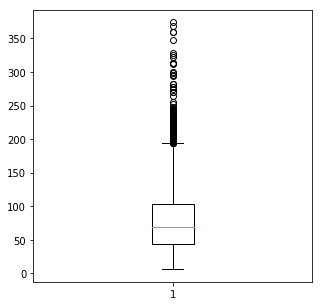

In [14]:
# plot the length of tweets in the training set
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [15]:
# show first ten entries that are longer than 140
df[df.pre_clean_len > 140].head(10)

sentiment                                               text  \
213           0  Awwh babs... you look so sad underneith that s...   
226           0  Tuesdayï¿½ll start with reflection ï¿½n then a...   
279           0  Whinging. My client&amp;boss don't understand ...   
343           0  @TheLeagueSF Not Fun &amp; Furious? The new ma...   
400           0  #3 woke up and was having an accident - &quot;...   
464           0  My bathtub drain is fired: it haz 1 job 2 do, ...   
492           0  pears &amp; Brie, bottle of Cabernet, and &quo...   
747           0  Have an invite for &quot;Healthy Dining&quot; ...   
957           0  Damnit I was really digging this season of Rea...   
1064          0  Why do I keep looking...I know that what I rea...   

      pre_clean_len  
213             142  
226             141  
279             145  
343             145  
400             144  
464             146  
492             150  
747             141  
957             141  
1064            141

In [16]:
# 1 problem: with HTML encoding! 
df.text[279]

"Whinging. My client&amp;boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&amp;reviewed correctly. "

In [18]:
# solve with beautiful soup
from bs4 import BeautifulSoup
example1 = BeautifulSoup(df.text[279], 'lxml')
print(example1.get_text())

Whinging. My client&boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&reviewed correctly. 


In [19]:
# 2 problems: mentions
# "Even though @mention carries a certain information (which another user that the tweet mentioned), this information doesn’t add value to build sentiment analysis model."
df.text[343]

'@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [20]:
import re
re.sub(r'@[A-Za-z0-9]+','',df.text[343])

' Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [21]:
# 3 problem: URLs
# to remove, same as mention
df.text[0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [22]:
re.sub('https?://[A-Za-z0-9./]+','',df.text[0])

"@switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [23]:
# 4 problem: UTF-8 BOM (Byte Order Mark)
df.text[226]

'Tuesdayï¿½ll start with reflection ï¿½n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

In [25]:
testing = df.text[226]
testing

'Tuesdayï¿½ll start with reflection ï¿½n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

### Method 2

In [6]:
from nltk import WordPunctTokenizer
from nltk import PorterStemmer
from nltk.corpus import stopwords
import gensim

In [7]:
def cleanDoc(doc):
    stopset = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    tokens = WordPunctTokenizer().tokenize(doc)
    clean = [token.lower() for token in tokens if token.lower() not in stopset and len(token) > 2]
    final = [stemmer.stem(word) for word in clean]
    return final

In [9]:
tweets_all = open('Twitter_MINING/SOM-text/tweets_11_2017_all.txt')
dictionary = gensim.corpora.Dictionary(line.lower().split() for line in tweets_all)
print(dictionary)

Dictionary(31046 unique tokens: ['#bim', '#bimscotland', '#cad', '#math', '/']...)


In [11]:
tweets_clean = open('Twitter_MINING/SOM-text/tweets_11_2017_termsonly.txt') # removed links, @mentions and stopwords
dictionary = gensim.corpora.Dictionary(line.lower().split() for line in tweets_clean)
print(dictionary)

Dictionary(14351 unique tokens: ['##cpl17', '#10', '#11bienaldearquitetura', '#121seaport', '#123ddesign']...)


In [12]:
class MyCorpus(object):
    def __iter__(self):
        for line in open('Twitter_MINING/SOM-text/tweets_11_2017_all.txt'):
            yield dictionary.doc2bow(line.lower().split())

In [15]:
corpus = MyCorpus()
gensim.corpora.MmCorpus.serialize('corpus.mm', corpus) # Save corpus to disk
corpus = gensim.corpora.MmCorpus('corpus.mm') # Load corpus
print(corpus)

MmCorpus(1018 documents, 14350 features, 74433 non-zero entries)


In [17]:
tfidf = gensim.models.TfidfModel(corpus)
print(tfidf)

TfidfModel(num_docs=1018, num_nnz=74433)


### Method 3

In [18]:
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from gensim.models import doc2vec
from collections import namedtuple

#### TF-IDF LOGISTIC REGRESSION

In [37]:
def get_tag_and_training_data(filename):
    '''takes the input file and returns  tokenized sentences and document tags as separate lists'''
    tags=[]
    documents=[]
    line_counter=1
    with open(filename) as f:
        for line in f:
            #skip first line
            if line_counter==1:
                line_counter=line_counter+1
                continue
            #Initialize the token list for line
            tags.append(line[:1])
            documents.append(line[2:])
    return tags,documents

In [38]:
Y,X=get_tag_and_training_data('Twitter_MINING/SOM-text/tweets_11_2017_all.txt')

In [39]:
#75:25 training test split
Y_train,Y_test=Y[:4120],Y[4120:]
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X)
freq_term_matrix = count_vectorizer.transform(X)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.transform(freq_term_matrix)

In [40]:
#train logistic regression model
X_train,X_test=tf_idf_matrix[:4120],tf_idf_matrix[4120:]
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train,Y_train)
pred=logreg.predict(X_test)
accuracy_score(Y_test, pred)

0.6886982311195848

In [44]:
# 2nd Category is BUSINESS NEWS,so lets test out a news peice on TESLA
logreg.predict(tfidf.transform((count_vectorizer.transform(["RT @Moneypenny: Massive congratulations to @AEWarchitects for their Corporate Workplace win at the #bcoawards. We absolutely ❤️ our… "]))))

array(['R'], dtype='<U1')

#### TF-IDF NAIVE BAYES

In [45]:
#initialize the Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train,Y_train)
nb_pred=clf.predict(X_test)
accuracy_score(Y_test, nb_pred)

0.5727147547929244

#### Doc2Vec Logisitc Regression

In [49]:
# data already loaded as lists of sentences in X and Y

docs = []
analyzedDocument = namedtuple('AnalyzedDocument', 'words tags')
for i, text in enumerate(X):
    words = text.lower().split()
    tags = [i]
    docs.append(analyzedDocument(words, tags))

# Train model (set min_count = 1, if you want the model to work with the provided example data set)
model = doc2vec.Doc2Vec(docs, vector_size = 160, window = 10, min_count = 7, workers = 4)

#making training and test sets
wb_Y_train,wb_Y_test=Y_train,Y_test
wb_X=[]
for i in range(len(X)):
    wb_X.append(model.docvecs[i])
wb_X_train=wb_X[:4120]
wb_X_test=wb_X[4120:]

#### Word Embeddings Logistic Regression

In [50]:
wb_logreg = linear_model.LogisticRegression(C=1e4)
wb_logreg.fit(wb_X_train,wb_Y_train)
wb_pred=wb_logreg.predict(wb_X_test)
accuracy_score(wb_Y_test, wb_pred)

0.5582035801292236

#### Word Embeddings Naive Bayes

In [47]:
wb_clf = GaussianNB()
wb_clf.fit(wb_X_train,wb_Y_train)
wb_nb_pred=wb_clf.predict(wb_X_test)
accuracy_score(wb_Y_test, wb_nb_pred)

NameError: name 'wb_X_train' is not defined

# Hopkins test for cluster tendency
Determines whether or not a data set contains clusters. The closer the output value is to 1, the higher is the cluster tendency.
from: https://matevzkunaver.wordpress.com/2017/06/20/hopkins-test-for-cluster-tendency/

In [ ]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print ujd, wjd
        H = 0
 
    return H